ANALISE DE DATASET DE FILMES

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [435]:
df = pd.read_csv('./movie_dataset.csv')
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [436]:
from collections import Counter

genres = df['genres'].dropna().str.split(' ')
genres_counter = Counter()

for thing in genres:
    genres_counter.update(thing)# contador ->  {GENERO:OCORRENCIA}

quantidade_generos = np.ndarray([],dtype=object)
for valor in genres_counter.values(): #separando as ocorrencias
    quantidade_generos = np.append(quantidade_generos,valor)
quantidade_generos = quantidade_generos[1:]

generos = np.ndarray([],dtype=object)
for item in genres_counter.keys(): # separando os generos
    generos = np.append(generos,item)
generos = generos[1:]




keyword = df['keywords'].dropna().str.split(' ')
keyword_counter = Counter()

for thing in keyword:
    keyword_counter.update(thing)# contador ->  {PALAVRA-CHAVE:OCORRENCIA}


DISTRIBUIÇÃO DE GÊNERO DE FILMES POR QUANTIDADE

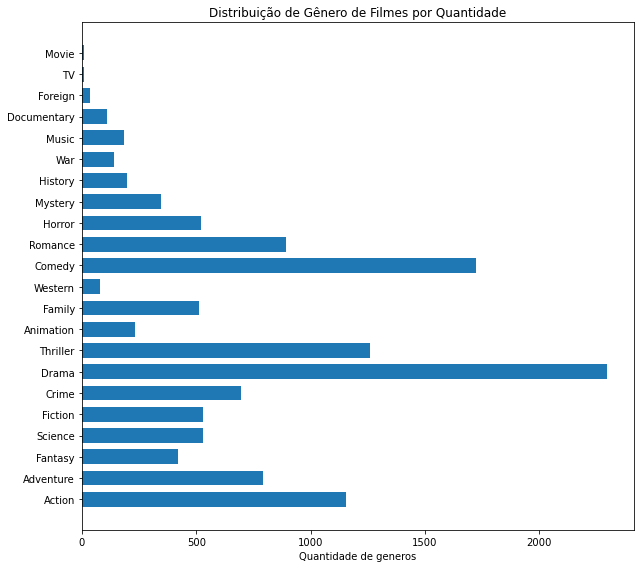

In [437]:
plt.figure(figsize=(9,8))
plt.xlabel('Quantidade de generos')
plt.title('Distribuição de Gênero de Filmes por Quantidade')
plt.barh(y=generos,width=quantidade_generos,height=0.7)
plt.tight_layout()
plt.show()

DISTRIBUIÇÃO DAS 20 TAGS MAIS RECORRENTES ASSOCIADAS AOS FILMES

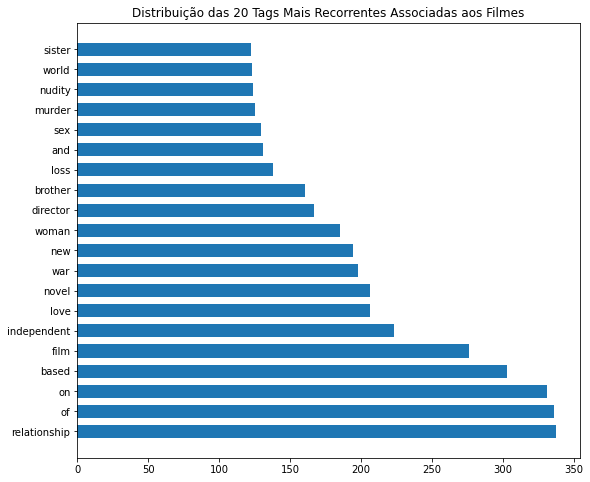

In [460]:
kw_df = pd.DataFrame(keyword_counter.items(), columns=['palavraChave', 'quantidade']) #dataframe de palavra-chave e quantidade
kw_df_reset = kw_df.sort_values('quantidade',ascending=False).reset_index(drop=True) # sorteando de forma decrescente

kw_sample = kw_df_reset.head(20) # selecionando os 20 maiores
kw_sample.index = kw_sample['palavraChave']

palavrasChave = kw_sample.index
quantidade = kw_sample['quantidade'].values

plt.figure(figsize=(9,8))
plt.barh(y=palavrasChave,width=quantidade,height=0.65)
plt.title("Distribuição das 20 Tags Mais Recorrentes Associadas aos Filmes")
plt.show()

DISTRIBUIÇÃO DOS 15 DIRETORES QUE MAIS FATURAM

<BarContainer object of 15 artists>

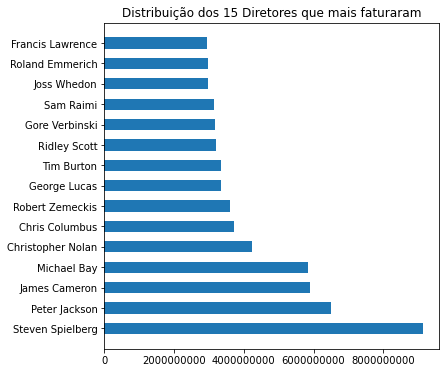

In [439]:
diretor_ganho = df[['revenue','director']]
diretor_ganho = diretor_ganho.loc[diretor_ganho['revenue'] > 0] # removendo inconsistência
diretor_ganho = diretor_ganho.groupby(by='director')['revenue'].sum() # Agrupando e somando o revenue de cada grupo
maiores_ganhos = diretor_ganho.nlargest(15) # tirando os 15 maiores ganhos

diretores = np.array(maiores_ganhos.index)
ganhos = np.array(maiores_ganhos.values)

plt.figure(figsize=(6,6))
plt.title('Distribuição dos 15 Diretores que mais faturaram')
plt.ticklabel_format(style='plain', axis='x')
plt.barh(y=diretores,width=ganhos,height=0.55)

RELAÇÃO ENTRE TEMPO DE DURAÇÃO E POPULARIDADE

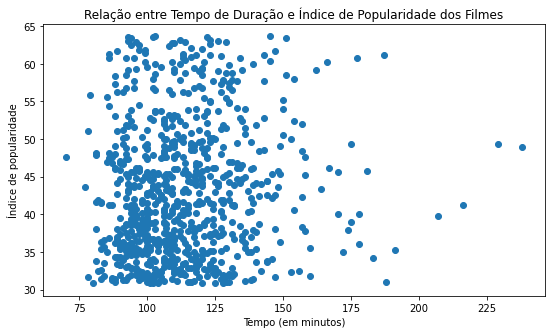

In [440]:
tempoFilme_popularidade = df[['popularity','runtime']]

qt1 = tempoFilme_popularidade['popularity'].quantile(0.25)
qt3 = tempoFilme_popularidade['popularity'].quantile(0.75)
tempoFilme_popularidade.reset_index()

iqt = qt3 - qt1 # distancia interquartil
out_plus = 1.5*iqt + qt3 # outlier:  > qt3
out_minus = 1.5*iqt - qt1# outlier:  < qt1


filtro = ((tempoFilme_popularidade['popularity'] > out_minus) & (tempoFilme_popularidade['popularity'] < out_plus) )

resultado = tempoFilme_popularidade.loc[filtro]

popularidade = resultado['popularity'].values
tempoFilme = resultado['runtime'].values
plt.figure(figsize=(9,5))
plt.xlabel('Tempo (em minutos)')
plt.ylabel('Índice de popularidade')
plt.ticklabel_format(style='plain', axis='x')
plt.scatter(tempoFilme,popularidade)

plt.title('Relação entre Tempo de Duração e Índice de Popularidade dos Filmes')
plt.show()

RELAÇÃO DE CUSTO DE PRODUÇÃO E POPULARIDADE

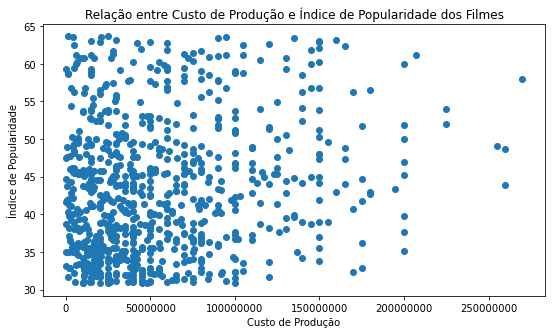

In [462]:
custo_popularidade = df[['popularity','budget']]

qt1 = custo_popularidade['popularity'].quantile(0.25)
qt3 = custo_popularidade['popularity'].quantile(0.75)
custo_popularidade.reset_index()

iqt = qt3 - qt1 # Distância interquartil
out_plus = 1.5*iqt + qt3 # outlier:  > qt3
out_minus = 1.5*iqt - qt1 # outlier: < qt1


filtro = (((custo_popularidade['popularity'] > out_minus) & (custo_popularidade['popularity'] < out_plus)) & (custo_popularidade['budget'] > 0) )

resultado = custo_popularidade.loc[filtro]

popularidade = resultado['popularity'].values
tempoFilme = resultado['budget'].values


plt.figure(figsize=(9,5))
plt.xlabel('Custo de Produção')
plt.ylabel('Índice de Popularidade')
plt.ticklabel_format(style='plain', axis='x')
plt.scatter(tempoFilme,popularidade)
plt.title('Relação entre Custo de Produção e Índice de Popularidade dos Filmes')
plt.show()

